In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
# Load the dataset
df = pd.read_csv("./train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## 1. Data Preprocessing

#### Dropping Irrelevant Columns

**Data Preprocessing: Dropping Irrelevant Columns**

In the process of preparing the dataset for classification modeling, several columns were identified as potentially irrelevant for predicting credit behavior. These columns were carefully evaluated based on their informational content, uniqueness, and relevance to the classification task.

1. **ID and Customer_ID**:
   - These columns serve as unique identifiers for each record in the dataset. However, as they do not contain predictive information regarding credit behavior, including them as features could lead to overfitting without contributing to the model's generalization performance.

2. **Month**:
   - The 'Month' column denotes the time period during which the data was recorded. While it may capture temporal trends, such as seasonality, it was deemed less relevant for predicting credit behavior in this context. Therefore, it was excluded to simplify the model and avoid unnecessary complexity.

3. **Name and SSN (Social Security Number)**:
   - Names and SSNs are considered personally identifiable information (PII) and are typically excluded from machine learning models due to privacy concerns. Moreover, names are unlikely to possess predictive power for credit classification, while SSNs serve solely as unique identifiers without direct relevance to credit behavior prediction.

By removing these columns from the dataset, we aimed to streamline the modeling process, mitigate the risk of overfitting, and address potential privacy considerations associated with sensitive information.

In [7]:
# Drop irrelevant columns
print(df.shape)
df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan'], axis=1)
print(df.shape)
df

(100000, 28)
(100000, 22)


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


#### Handle missing values
[related works](https://www.mathworks.com/help/finance/impute-missing-data-using-k-nearest-neighbor.html)

In [8]:
# Check for messing data
def detect_missing_data(df):
    missing_data = {}  # Dictionary to store missing data information
    for column in df.columns:
        missing_count = df[column].isnull().sum()  # Count missing values in the column
        if missing_count > 0:
            missing_data[column] = missing_count  # Store column name and missing count
    return missing_data

# Example usage:
missing_data_info = detect_missing_data(df)
print("Columns with missing data:")
for column, count in missing_data_info.items():
    print(f"{column}: {count} missing values")


Columns with missing data:


==> The data set then have no messing data

In [9]:
# Handle missing values (if any)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(100000, 22)
(100000, 22)


#### Encode categorical variables

Label encoding categorical variables before applying the k-Nearest Neighbors (kNN) algorithm is done to ensure that the algorithm can properly interpret and use these variables in the distance calculations.

The kNN algorithm relies on calculating distances between data points to make predictions. When dealing with categorical variables, these variables need to be encoded into numerical values because most distance metrics (such as Euclidean distance) work with numerical data.

By using label encoding, we convert categorical variables into numerical labels. This allows the kNN algorithm to compute distances between data points effectively, as it can now measure the similarity or dissimilarity between instances based on their numerical representations.

For example, consider a categorical variable like "Occupation" with values "Teacher", "Scientist", and "Engineer". After label encoding, these categories might be represented as 0, 1, and 2, respectively. Now, the kNN algorithm can calculate distances between instances based on these numerical labels.

It's important to note that label encoding assumes an ordinal relationship between the categories, meaning that the numerical labels imply some inherent order. If the categorical variables do not have a meaningful order (nominal variables), one-hot encoding is often preferred to avoid introducing unintended ordinal relationships.

In summary, label encoding is performed before applying kNN to ensure that categorical variables are properly represented as numerical values, enabling the algorithm to effectively compute distances and make predictions based on these variables.

---

The `label_encoders` dictionary represents a collection of `LabelEncoder` objects, each associated with a specific categorical column in the dataset. 

Here's what each component of the `label_encoders` dictionary represents:

- **Key**: The column name (e.g., 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Score').
- **Value**: The corresponding `LabelEncoder` object created for that column.

Each `LabelEncoder` object is fitted to the unique values present in its respective column and is then used to transform those categorical values into numerical labels.

After executing the provided code, the `label_encoders` dictionary will contain four entries, each corresponding to one of the specified categorical columns. These `LabelEncoder` objects are stored for potential future use, such as transforming categorical values during model inference or when working with new data.

In [10]:
# Encode categorical variables (Label Encoding for simplicity)
label_encoders = {}
encoded_values = {}

categorical_columns = [
    'Occupation',
    'Credit_Mix',
    'Payment_Behaviour',
    'Payment_of_Min_Amount',
    'Credit_Score', 
]
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    encoded_values[column] = dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))

In [11]:
# encoded_values

In [12]:
def print_values(column):
    values = encoded_values[column]
    print(f"{column}:")
    for value, code in values.items():
        print(f"  {value}: {code}")

In [13]:
print_values("Occupation")

Occupation:
  Accountant: 0
  Architect: 1
  Developer: 2
  Doctor: 3
  Engineer: 4
  Entrepreneur: 5
  Journalist: 6
  Lawyer: 7
  Manager: 8
  Mechanic: 9
  Media_Manager: 10
  Musician: 11
  Scientist: 12
  Teacher: 13
  Writer: 14


In [15]:
print_values("Credit_Mix")

Credit_Mix:
  Bad: 0
  Good: 1
  Standard: 2


In [16]:
print_values("Payment_Behaviour") 

Payment_Behaviour:
  High_spent_Large_value_payments: 0
  High_spent_Medium_value_payments: 1
  High_spent_Small_value_payments: 2
  Low_spent_Large_value_payments: 3
  Low_spent_Medium_value_payments: 4
  Low_spent_Small_value_payments: 5


In [17]:
print_values("Payment_of_Min_Amount")

Payment_of_Min_Amount:
  NM: 0
  No: 1
  Yes: 2


In [18]:
print_values("Credit_Score")

Credit_Score:
  Good: 0
  Poor: 1
  Standard: 2


In [19]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089,0
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162,0
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863,0
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228,1
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610,1
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979,2


#### Split features and target variable

1. **Splitting features and target variable**:
   - We split the dataset into features (X) and the target variable (y) to adhere to the conventional machine learning practice. By separating the target variable from the features, we create distinct entities for prediction and input. This separation enables us to clearly define what we want to predict (the target) and what information we will use to make those predictions (the features). In the context of the k-Nearest Neighbors (kNN) algorithm, we need to separate the target variable from the features because kNN predicts the target variable based on the features of the nearest neighbors.

2. **Splitting the dataset into training and testing sets**:
   - We split the dataset into training and testing sets to evaluate the performance of the kNN model. The training set is used to train the model on historical data, while the testing set is held out to assess how well the model generalizes to new, unseen data. This split allows us to estimate the model's performance on unseen data, which is crucial for understanding its real-world applicability and potential for generalization.

In [20]:
# Split features and target variable
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
75220,20.0,6,101399.130,8535.927500,1.0,3.0,2.0,2.0,14.0,6.0,...,4.0,1,1061.06,42.681159,297.0,1,132.674897,100.938342,1,856.618467
48955,25.0,0,112882.680,9684.890000,5.0,1.0,10.0,4.0,12.0,10.0,...,0.0,1,722.90,40.090839,347.0,1,353.616124,74.422921,0,688.426466
44966,49.0,12,28101.460,2173.463807,5.0,7.0,8.0,3.0,28.0,8.0,...,4.0,2,454.67,23.607892,321.0,1,268.268012,85.634011,5,242.921080
13568,34.0,8,22438.270,1856.855833,7.0,7.0,9.0,4.0,16.0,13.0,...,3.0,2,167.57,27.094189,346.0,1,58.436308,46.038344,3,292.083631
92727,28.0,10,20975.400,1943.950000,2.0,3.0,9.0,1.0,2.0,9.0,...,1.0,1,731.40,26.205042,291.0,0,16.196792,46.684791,1,361.040007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,46.0,2,82065.160,6771.763333,5.0,5.0,3.0,3.0,12.0,9.0,...,1.0,1,106.83,35.131041,276.0,1,180.340607,47.046240,2,316.995547
54886,20.0,0,14920.970,1424.414167,6.0,10.0,16.0,2.0,61.0,16.0,...,12.0,2,1288.58,33.572279,161.0,2,19.909512,53.554008,5,302.447665
76820,38.0,8,66858.270,5770.522500,3.0,6.0,20.0,4.0,8.0,10.0,...,4.0,2,601.58,37.982933,337.0,0,175.015182,76.774288,4,317.330016
860,55.0,3,19403.405,1904.950417,1.0,7.0,3.0,3.0,12.0,9.0,...,2.0,1,339.11,36.826610,200.0,1,39.214914,12.699574,3,251.421930


In [22]:
y_train

75220    2
48955    0
44966    0
13568    2
92727    0
        ..
6265     0
54886    1
76820    2
860      2
15795    1
Name: Credit_Score, Length: 80000, dtype: int32

#### Scale features

Scaling the features using a StandardScaler is a crucial step in preparing the data for training a k-Nearest Neighbors (kNN) model. Let's discuss why we perform feature scaling and its effects on training:

1. **Why we do this**:
   - Feature scaling ensures that all features contribute equally to the distance calculations in the kNN algorithm. Since kNN relies on measuring distances between data points to make predictions, features with larger scales can dominate the distance metric and lead to biased results. By scaling the features to have a similar range (typically centered around zero with a standard deviation of one), we prevent any single feature from disproportionately influencing the distance calculations. This results in a more balanced and accurate representation of the underlying data distribution.

2. **Effect on training**:
   - Scaling the features using a StandardScaler affects the training process in several ways:
      - **Improved convergence**: Scaling features to a similar range can lead to faster convergence during the optimization process, especially in algorithms that rely on gradient-based optimization techniques.
      - **Enhanced model performance**: By reducing the influence of features with larger scales, scaling can lead to a more accurate and reliable model. This can result in better predictive performance, especially in scenarios where features have different units or magnitudes.
      - **Stabilized training**: Scaling can help stabilize the training process by reducing the likelihood of numerical instability or overflow issues, particularly in algorithms sensitive to the scale of input features.
      - **Facilitated interpretation**: Scaling features to a common scale can simplify the interpretation of model coefficients or parameters, making it easier to understand the relative importance of different features in the prediction process.

In summary, scaling features using a StandardScaler before training a kNN model helps to mitigate the influence of feature scales on distance calculations, leading to a more balanced and accurate model. It enhances model performance, stabilizes the training process, and facilitates the interpretation of model results.

In [23]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Feature Selection/Engineering

In this step, we focus on selecting or engineering the features that are most relevant for classification. This involves evaluating the existing features to determine their significance in predicting the target variable and making informed decisions about whether to keep, modify, or create new features based on domain knowledge and expertise.

The process of feature selection/engineering may include:

- **Identifying irrelevant features**: We assess each feature's importance in predicting the target variable. Features that are deemed irrelevant or redundant may be dropped from the dataset to simplify the model and reduce computational complexity.

- **Creating new features**: Based on domain knowledge and understanding of the problem domain, we may create new features that capture important relationships or interactions between existing features. This could involve combining existing features, transforming variables, or generating entirely new features.

- **Feature scaling**: While we've already scaled the features for distance-based algorithms like kNN, other algorithms may require different scaling techniques or normalization methods to ensure optimal performance.

- **Handling categorical variables**: Depending on the algorithm used, we may need to further encode categorical variables using techniques like one-hot encoding or ordinal encoding to represent them appropriately in the model.

Overall, the goal of feature selection/engineering is to optimize the dataset for the chosen classification algorithm, ensuring that it contains the most relevant and informative features while minimizing noise and redundancy. This iterative process often involves domain expertise, experimentation, and validation to arrive at the best set of features for training the model.

### Identifying irrelevant features

Identifying irrelevant features involves assessing each feature's importance in predicting the target variable. Here's how you might approach this task:

1. **Statistical methods**:
   - Use correlation coefficients or statistical tests (e.g., chi-squared test for categorical features, ANOVA for numerical features) to quantify the relationship between each feature and the target variable. Features with low correlation or statistical significance may be considered irrelevant.

2. **Feature importance techniques**:
   - For tree-based models (e.g., Random Forest, Gradient Boosting), utilize feature importance scores provided by the model to identify which features contribute most to the prediction. Features with low importance scores may be candidates for removal.

3. **Domain knowledge**:
   - Leverage domain expertise to assess the relevance of each feature in the context of the problem domain. Features that are not theoretically meaningful or do not align with domain knowledge may be considered irrelevant.

4. **Visualization**:
   - Visualize the relationship between each feature and the target variable using plots such as scatter plots, box plots, or histograms. Features that show no clear relationship with the target variable may be considered irrelevant.

5. **Forward/backward feature selection**:
   - Iteratively add or remove features from the model and evaluate the model's performance (e.g., using cross-validation or a validation set). Features that do not significantly improve the model's performance may be considered irrelevant and removed.

6. **Regularization**:
   - Use regularization techniques (e.g., Lasso regression) that penalize the inclusion of irrelevant features in the model. Features with low coefficients or that are set to zero by the regularization penalty may be considered irrelevant.

By employing these methods, you can systematically evaluate the relevance of each feature and identify those that are less informative or redundant for predicting the target variable. Removing irrelevant features can simplify the model, improve computational efficiency, and potentially enhance predictive performance.

##### Statistical methods

Let's apply statistical methods to identify irrelevant features using correlation coefficients and statistical tests:

1. **Correlation Coefficients**:
   - For numerical features, we can compute the Pearson correlation coefficient between each feature and the target variable.
   - For categorical features, we can use point-biserial correlation for binary targets or eta correlation for multi-class targets.

2. **Statistical Tests**:
   - For numerical features, we can use ANOVA (Analysis of Variance) test to assess the statistical significance of the relationship between each feature and the target variable.
   - For categorical features, we can use chi-squared test to determine the association between each feature and the target variable.

In [24]:
import pandas as pd
from scipy.stats import pearsonr

# Compute correlation coefficients for numerical features
correlation_results = {}

# For numerical features (assuming they are in X_train)
numerical_features = X_train.select_dtypes(include=['number'])
for column in numerical_features.columns:
    correlation, p_value = pearsonr(X_train[column], y_train)
    correlation_results[column] = {'correlation': correlation, 'p_value': p_value}

# Create a DataFrame from correlation_results
correlation_df = pd.DataFrame(correlation_results).T
correlation_df.index.name = 'Feature'

# Print the DataFrame
print(correlation_df)

                          correlation        p_value
Feature                                             
Age                         -0.056716   5.318068e-58
Occupation                   0.004842   1.708665e-01
Annual_Income               -0.080333  1.191046e-114
Monthly_Inhand_Salary       -0.078285  5.865438e-109
Num_Bank_Accounts            0.179296   0.000000e+00
Num_Credit_Card              0.115999  1.135170e-237
Interest_Rate                0.122118  2.270414e-263
Num_of_Loan                  0.064405   2.719737e-74
Delay_from_due_date          0.098180  1.577397e-170
Num_of_Delayed_Payment       0.205005   0.000000e+00
Changed_Credit_Limit         0.190264   0.000000e+00
Num_Credit_Inquiries         0.068745   2.102273e-84
Credit_Mix                   0.231089   0.000000e+00
Outstanding_Debt             0.034924   5.044946e-23
Credit_Utilization_Ratio    -0.014700   3.212410e-05
Credit_History_Age          -0.103901  7.659387e-191
Payment_of_Min_Amount        0.181876   0.0000

In [25]:
# Sort correlation results based on absolute correlation coefficient and low p-values
significant_features = correlation_df[
    (correlation_df['correlation'].abs() > 0.1) & (correlation_df['p_value'] < 0.05)
].sort_values(by=['correlation'], ascending=False)

# Print the most significant features
print(significant_features)

                        correlation        p_value
Feature                                           
Credit_Mix                 0.231089   0.000000e+00
Num_of_Delayed_Payment     0.205005   0.000000e+00
Changed_Credit_Limit       0.190264   0.000000e+00
Payment_of_Min_Amount      0.181876   0.000000e+00
Num_Bank_Accounts          0.179296   0.000000e+00
Interest_Rate              0.122118  2.270414e-263
Num_Credit_Card            0.115999  1.135170e-237
Credit_History_Age        -0.103901  7.659387e-191


In [26]:
# Filter X_train and X_test to keep only significant features
X_train_filtered = X_train[significant_features.index]
X_test_filtered = X_test[significant_features.index]

# Print the shape of the filtered datasets to verify
print("Shape of X_train_filtered:", X_train_filtered.shape)
print("Shape of X_test_filtered:", X_test_filtered.shape)

X_train_filtered

Shape of X_train_filtered: (80000, 8)
Shape of X_test_filtered: (20000, 8)


,Credit_Mix,Num_of_Delayed_Payment,Changed_Credit_Limit,Payment_of_Min_Amount,Num_Bank_Accounts,Interest_Rate,Num_Credit_Card,Credit_History_Age
75220,1,6.0,4.97,1,1.0,2.0,3.0,297.0
48955,1,10.0,6.24,1,5.0,10.0,1.0,347.0
44966,2,8.0,1.85,1,5.0,8.0,7.0,321.0
13568,2,13.0,11.24,1,7.0,9.0,7.0,346.0
92727,1,9.0,9.94,0,2.0,9.0,3.0,291.0
...,...,...,...,...,...,...,...,...
6265,1,9.0,5.55,1,5.0,3.0,5.0,276.0
54886,2,16.0,13.48,2,6.0,16.0,10.0,161.0
76820,2,10.0,4.16,0,3.0,20.0,6.0,337.0
860,1,9.0,3.90,1,1.0,3.0,7.0,200.0


## Split Data

In [27]:
X_train = X_train_filtered
X_test = X_test_filtered

y_train
y_test

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Visualize the data

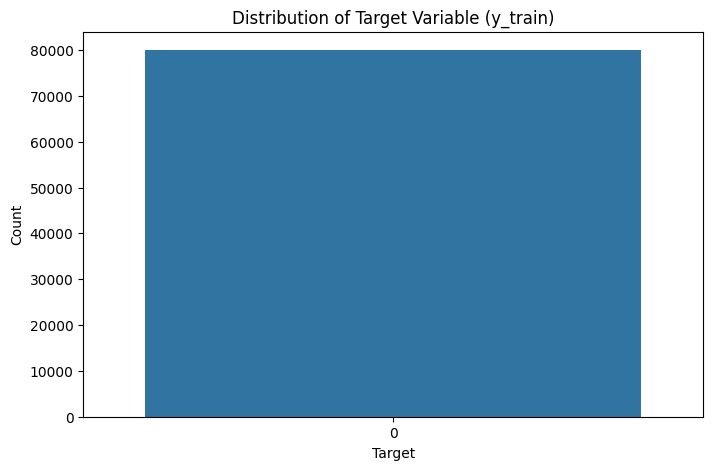

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


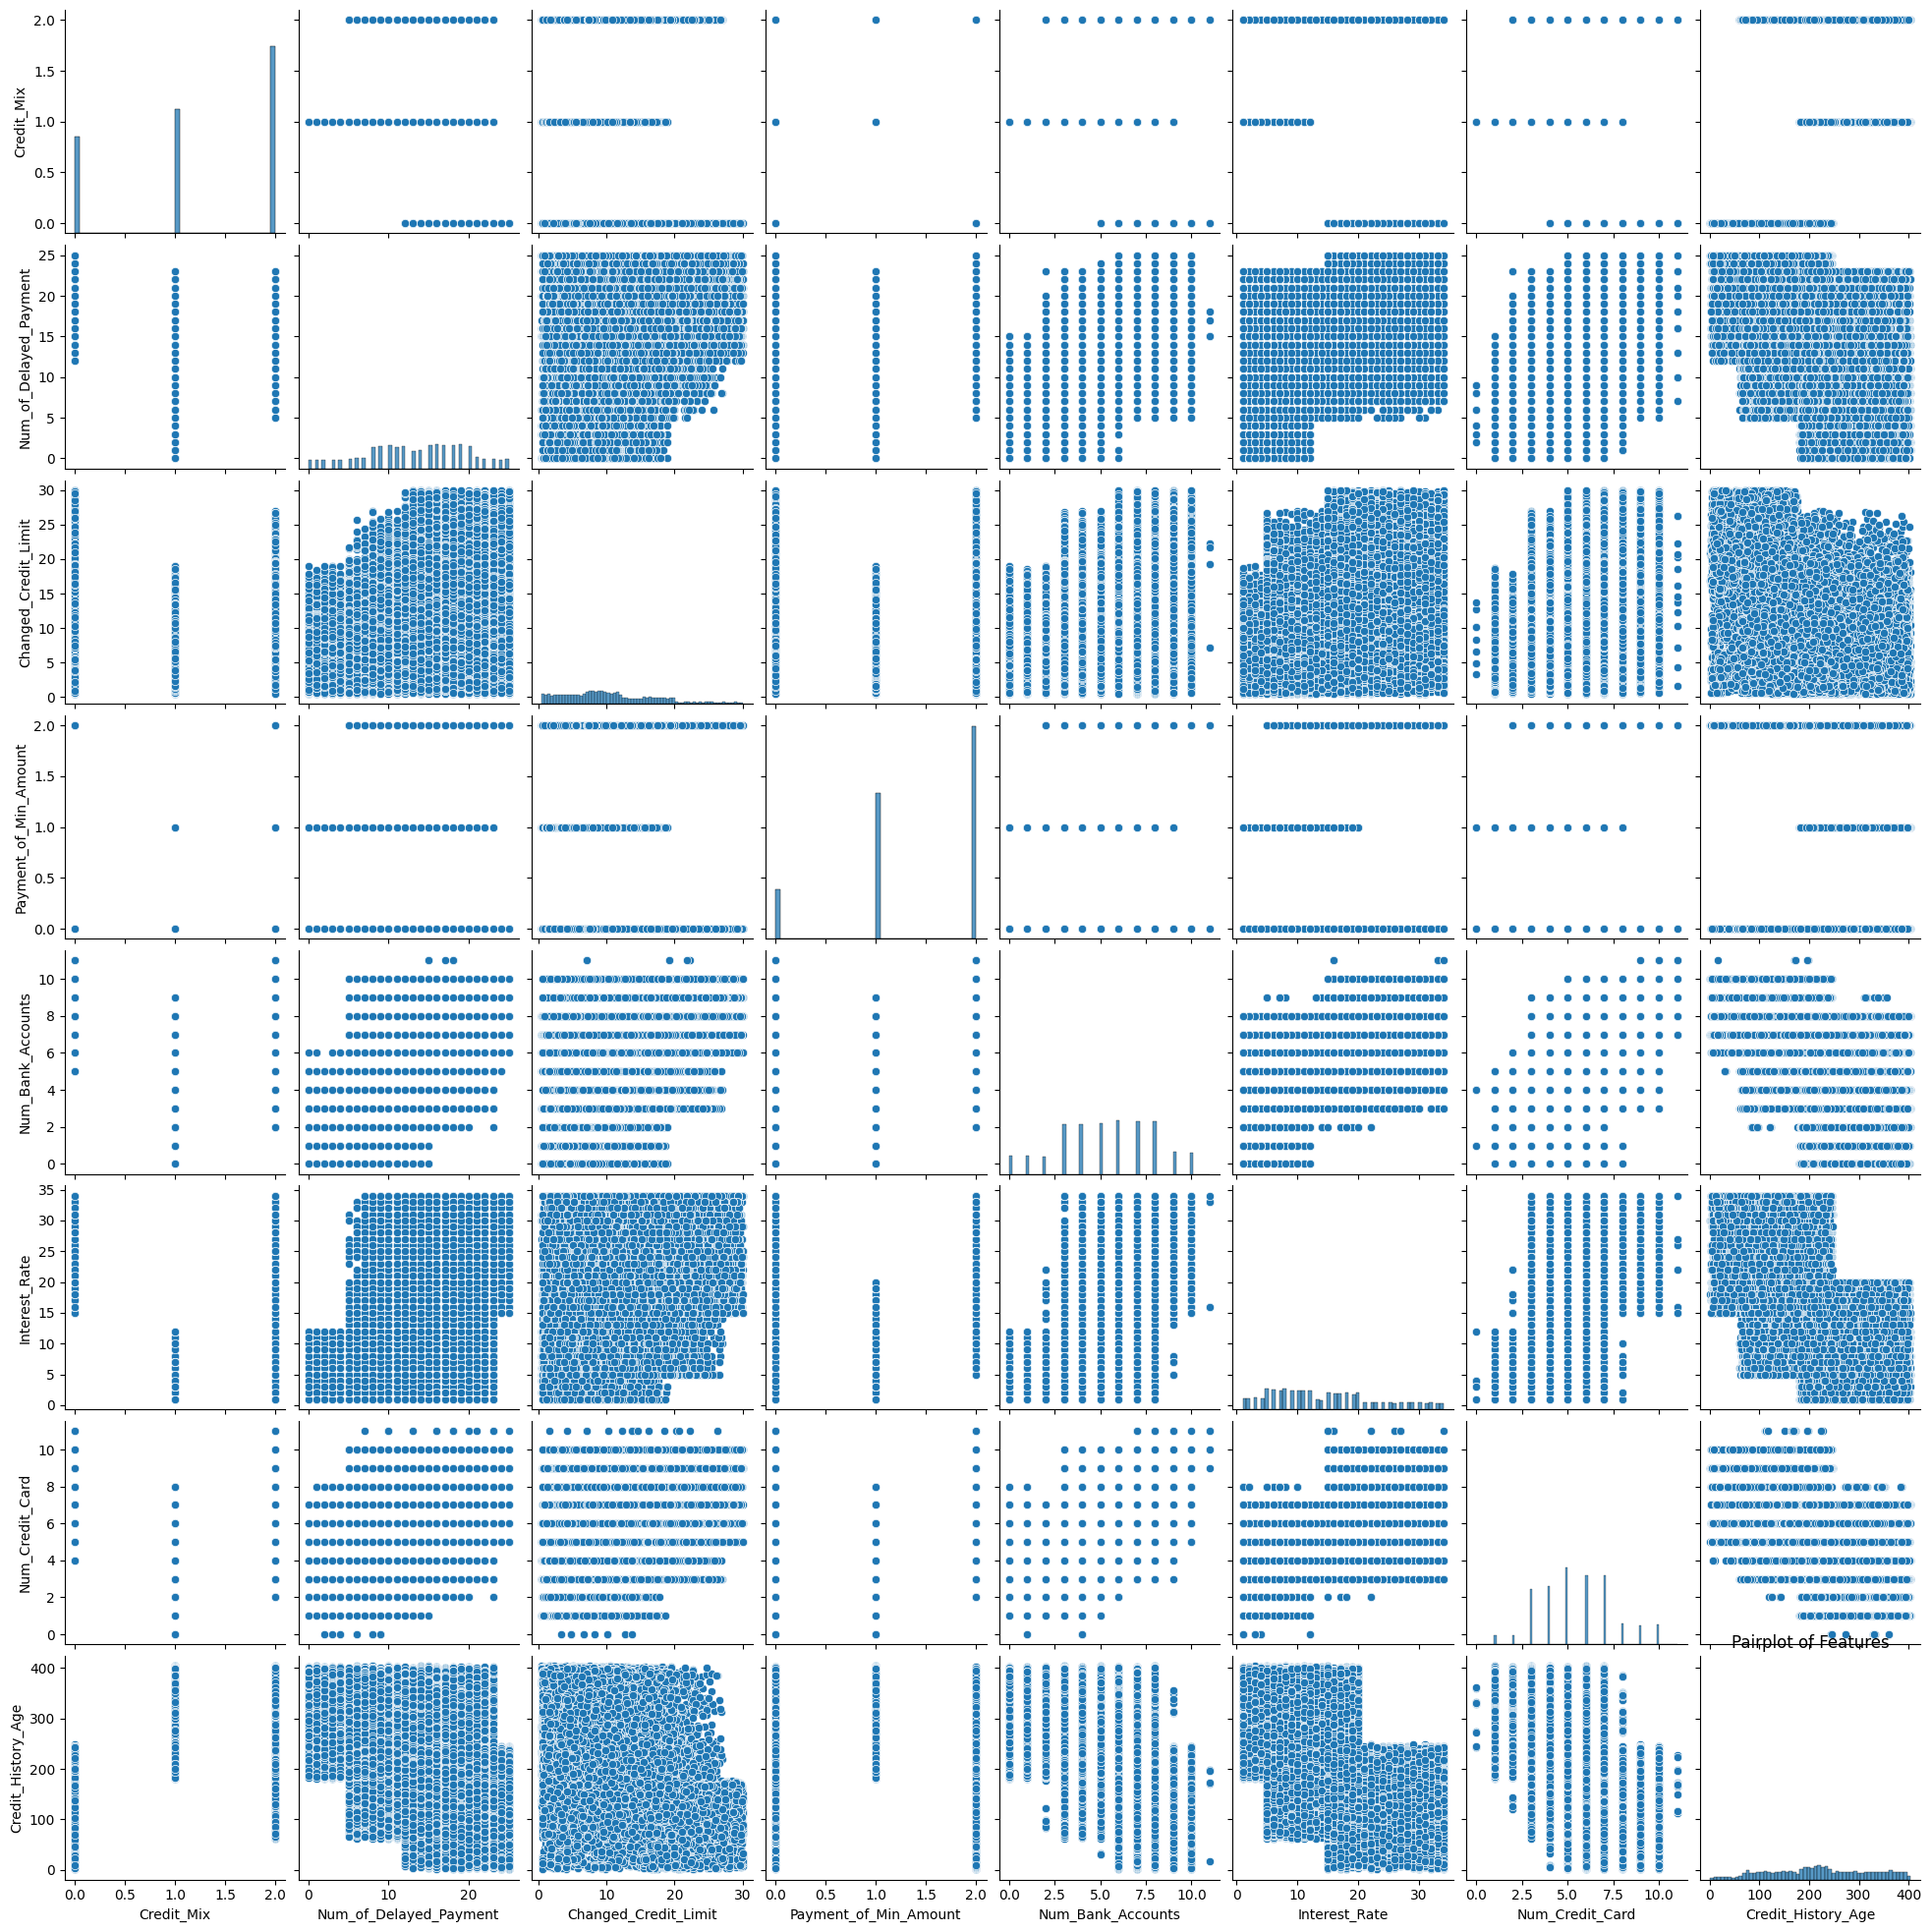

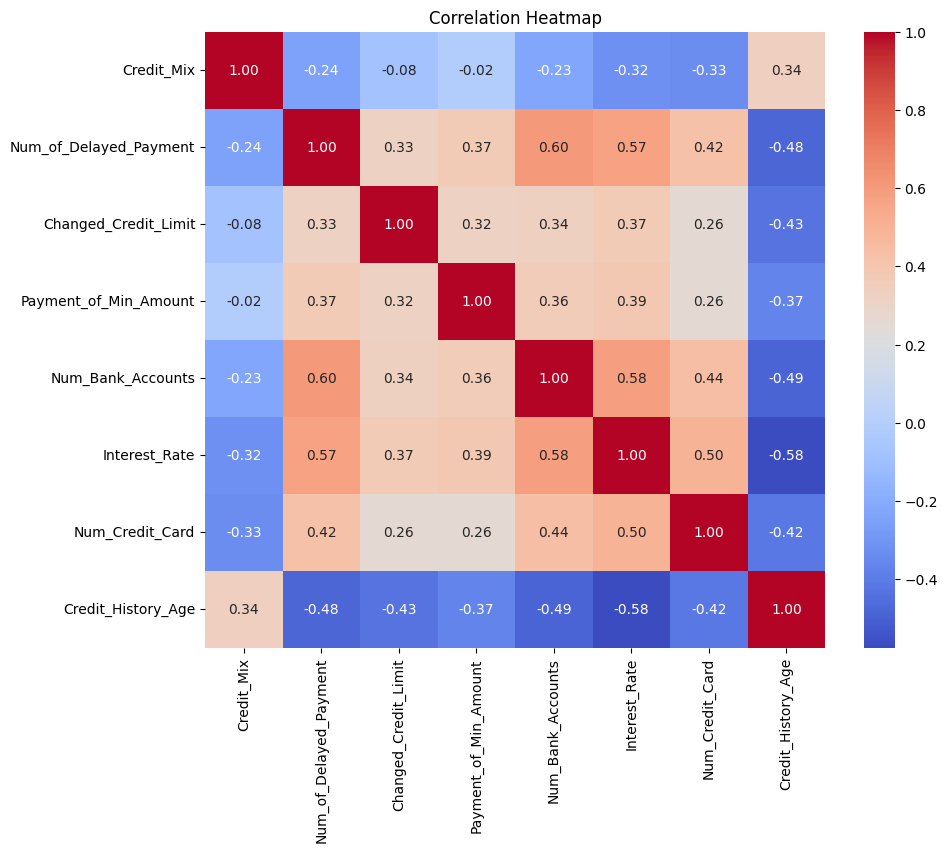

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(y_train)
plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Pairplot
sns.pairplot(X_train_filtered)
plt.title('Pairplot of Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Choose k

Deciding on the value of k (number of neighbors) for kNN is a crucial step in the modeling process. The choice of k can significantly impact the performance of the kNN algorithm. Here's how you can proceed with choosing the value of k:

1. **Domain Knowledge**: Consider any domain-specific knowledge that might suggest an appropriate range for k. For example, if you know that similar instances tend to have similar class labels, you might choose a smaller value of k. On the other hand, if the decision boundaries are complex and noisy, a larger value of k might be more appropriate.

2. **Hyperparameter Tuning**: Use techniques like grid search or random search coupled with cross-validation to find the optimal value of k. This involves evaluating the performance of the kNN algorithm for different values of k on a validation set or through cross-validation and selecting the value that yields the best performance.

3. **Cross-Validation**: Perform k-fold cross-validation to estimate the model's performance for different values of k. This helps in assessing the model's generalization ability and prevents overfitting. You can use metrics such as accuracy, precision, recall, or F1-score to evaluate the model's performance for each value of k.

4. **Plotting Validation Curve**: Plot a validation curve to visualize how the model's performance changes with different values of k. This can help identify the optimal range or specific value of k that maximizes the model's performance.

5. **Grid Search**: Use scikit-learn's `GridSearchCV` or `RandomizedSearchCV` to perform an exhaustive or randomized search over a specified range of k values. These functions automatically perform cross-validation and select the best value of k based on the specified scoring metric.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of k values to search
param_grid = {'n_neighbors': range(1, 21)}

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best value of k:", best_k)


Best value of k: 1


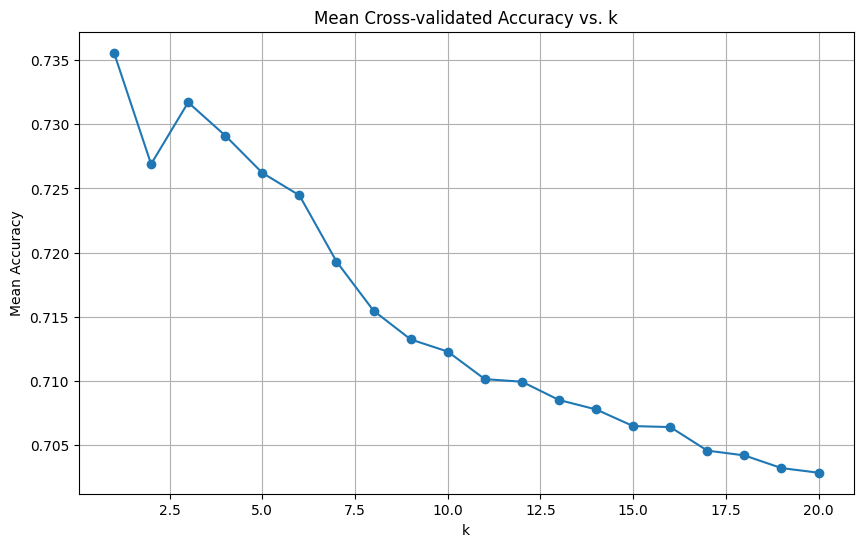

In [30]:
import matplotlib.pyplot as plt

# Extract the mean cross-validated scores for each value of k
mean_scores = grid_search.cv_results_['mean_test_score']

# Extract the values of k from the parameter grid
k_values = param_grid['n_neighbors']

# Plot the relationship between k and the mean cross-validated scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-validated Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()


## Train the Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize kNN classifier with the best value of k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

## Predictions

In [32]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

## Evaluate Model Performance

Accuracy: 0.7467
Precision: 0.7465934907419655
Recall: 0.7467
F1-score: 0.7466437535859953
Confusion Matrix:
[[2426  110  991]
 [ 114 4310 1450]
 [ 970 1431 8198]]


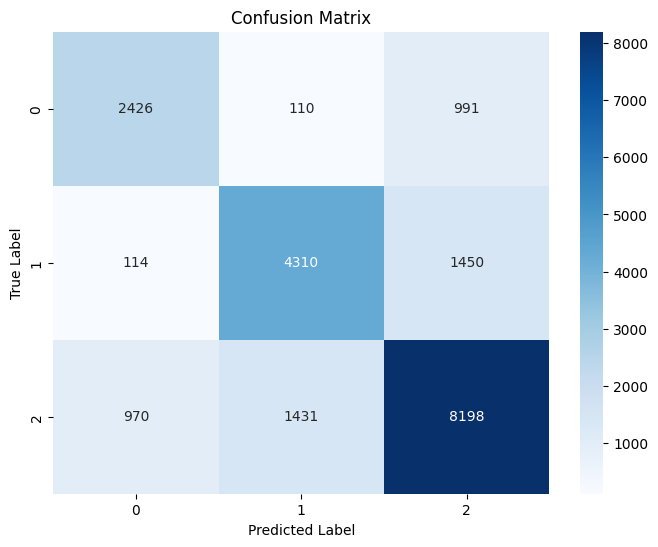

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Model Evaluation Report**

1. **Accuracy**: The accuracy of the model is approximately 74.67%. This indicates the proportion of correctly classified instances out of all instances in the test set.

2. **Precision**: The precision of the model is approximately 74.66%. Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A higher precision indicates fewer false positives.

3. **Recall**: The recall of the model is also approximately 74.67%. Recall measures the proportion of true positive predictions out of all actual positive instances in the test set. A higher recall indicates fewer false negatives.

4. **F1-score**: The F1-score of the model is approximately 74.66%. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when the classes are imbalanced.

5. **Confusion Matrix**:
   - The confusion matrix provides a detailed breakdown of the model's predictions. It shows the number of true positive, false positive, true negative, and false negative predictions for each class.
   - In this case, the confusion matrix shows three classes: class 0, class 1, and class 2.
   - The diagonal elements represent the number of correctly classified instances for each class, while off-diagonal elements represent misclassifications.
   - For example, the element at row 1, column 3 (indexing starts from 0) indicates that the model predicted class 2 for 991 instances that actually belong to class 0.

**Conclusion**:

Based on these results, the model demonstrates reasonably good performance in terms of overall accuracy, precision, recall, and F1-score. However, further analysis may be required to identify areas for improvement and understand the characteristics of misclassified instances. It is also essential to consider the context of the problem and the implications of the model's performance for making informed decisions.

## Iterate

### K = 3

Accuracy: 0.7468
Precision: 0.748948734079758
Recall: 0.7468
F1-score: 0.7475461384356552
Confusion Matrix:
[[2480   96  951]
 [ 218 4420 1236]
 [1116 1447 8036]]


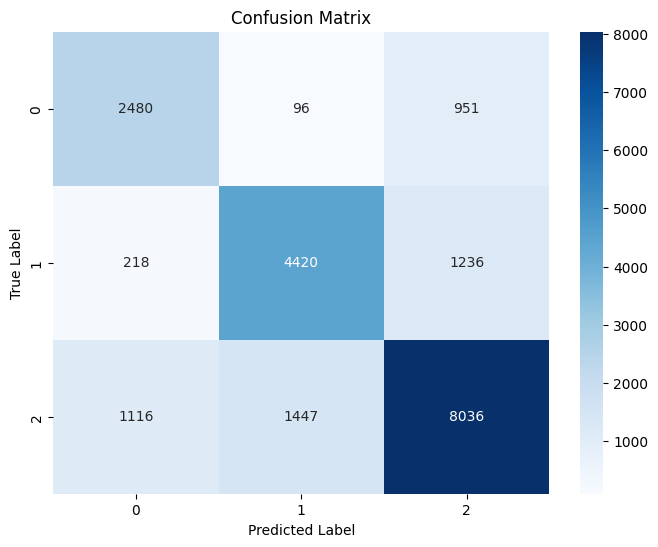

In [34]:
from sklearn.neighbors import KNeighborsClassifier

K = 3

# Initialize kNN classifier with the best value of k
knn_classifier = KNeighborsClassifier(n_neighbors=K)

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Effect of choosing K

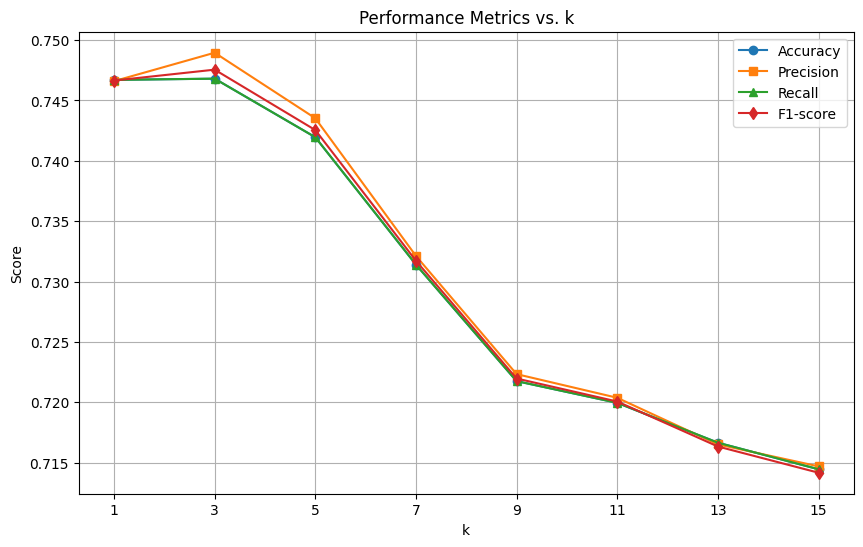

In [35]:
import numpy as np

# Define a list of k values to experiment with
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store performance metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize kNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the kNN classifier on the training data
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append performance metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the performance metrics for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='s')
plt.plot(k_values, recalls, label='Recall', marker='^')
plt.plot(k_values, f1_scores, label='F1-score', marker='d')
plt.title('Performance Metrics vs. k')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [36]:
# Make predictions on the training data
y_train_pred = knn_classifier.predict(X_train_scaled)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate precision on the training data
train_precision = precision_score(y_train, y_train_pred, average='weighted')

# Calculate recall on the training data
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Calculate F1-score on the training data
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Print the results for the training data
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("Training Confusion Matrix:")
print(train_conf_matrix)


Training Accuracy: 0.7470375
Training Precision: 0.747454295250006
Training Recall: 0.7470375
Training F1-score: 0.7469906664832764
Training Confusion Matrix:
[[ 9887   550  3864]
 [ 1429 16150  5545]
 [ 3697  5152 33726]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize kNN classifier with the best value of k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = knn_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = knn_classifier.predict(X_test_scaled)

# Calculate performance metrics on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Calculate performance metrics on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the results for the training data
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("Training Confusion Matrix:")
print(train_conf_matrix)

# Print the results for the test data
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)
print("Test Confusion Matrix:")
print(test_conf_matrix)


Training Accuracy: 0.9995875
Training Precision: 0.9995875008775101
Training Recall: 0.9995875
Training F1-score: 0.9995874990196496
Training Confusion Matrix:
[[14294     0     7]
 [    0 23113    11]
 [    6     9 42560]]
Test Accuracy: 0.7467
Test Precision: 0.7465934907419655
Test Recall: 0.7467
Test F1-score: 0.7466437535859953
Test Confusion Matrix:
[[2426  110  991]
 [ 114 4310 1450]
 [ 970 1431 8198]]


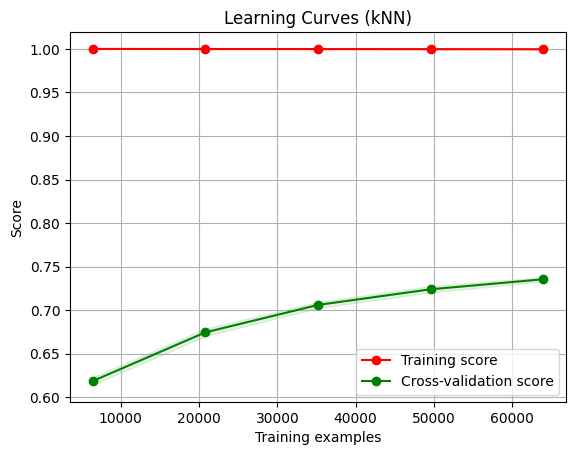

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_learning_curve(estimator, X, y, title, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Combine scaling and kNN into a pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))

# Plot the learning curve
title = "Learning Curves (kNN)"
cv = 5  # Number of folds in cross-validation

plot_learning_curve(pipeline, X_train_scaled, y_train, title, cv=cv, n_jobs=-1)

plt.show()


The image you sent is the result of plotting the learning curve of a KNeighborsClassifier (KNN) model. The x-axis represents the number of training examples and the y-axis represents the score (accuracy). The two lines represent the training score and the cross-validation score. 

A learning curve is a diagnostic tool used in machine learning to analyse how well a model performs with increasing amounts of training data. In this case, the KNN model seems to be performing well as both the training score and the cross-validation score are increasing with more data and they are very close to each other. This suggests that the model is generalizing well and is not overfitting the training data.

Here are some of the things you can learn from a learning curve:

* **Bias and variance:** If the training score is significantly higher than the cross-validation score, it may indicate that the model is overfitting the training data. This means that the model is learning the specific patterns of the training data but is not generalizing well to unseen data. On the other hand, if the training score is much lower than the cross-validation score, it may indicate that the model is underfitting the training data. This means that the model is not learning the patterns in the data well.
* **Sample size:** The learning curve can help you determine how much training data is needed to train a model effectively. If the scores are still increasing significantly as the number of training examples increases, it may indicate that more data is needed.

I hope this helps!